# Getting Sensitivity of Cruise Method to Small Changes in Input Variables

Purpose: Develop symbolic math surrounding a derivative based local method, to explore the sensitivity of drag coefficient measurement to range of airspeeds cruising at.  

## Setting up Environment and Variables

In [12]:
from sympy import init_printing
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget
plt.style.use('../basic_plotter.mplstyle')
# Defining static conditions for cruise
[n_0, V_0, rho_0, C_D_0, X_T_0]= symbols('n_0 V_0 \\rho_0 C_{D_0} X_{T_0}')
rho_0 = 1.225

# Defining complete input variables
[V_T, V,  U_dot, W_dot, h_dot, theta, n, rho, D, m, g, S, P, T] = symbols('V_T V \dot{U} \dot{W} \\dot{h} \\theta n \\rho D m g S P T')

# Defining outputs
[C_D, C_T, J, alpha] = symbols('C_D C_T J \\alpha')

dV = Symbol('\\Delta V')
dU_dot = Symbol('\\Delta \dot{U}')
dW_dot = Symbol('\\Delta \dot{W}')
dh_dot = Symbol('\\Delta \dot{h}')

dtheta = Symbol('\\Delta \\theta')
dn = Symbol('\\Delta n')
drho = Symbol('\\Delta \\rho')
dg = Symbol('\\Delta g')

## Defining the Operating Points at Cruise (For CREATeV)

Assumptions:
* No wind to speak of
* Perturbations happen one at a time, not all at once
* Cruising at conditions defined by some assumed drag polar
  * Drag Polar: $C_D = C_{D_0} + k C_L^2$
  * $C_{D_0} = 0.018$
  * $AR = \frac{b^2}{S} = 6.2V_op[i]^2 / (6.28 * 0.395) = 15.89$
  * $k = 1 / (\pi AR e) = 0.03$ (Assumption from range of polar results (0.029 to 0.0556))

In [13]:
# Defining Operating Points in Cruise (cruise_operatingpoints_working.ipynb)
# Based on 20x8 and CREATeV performance (cd0 = 0.018, k = 0.03)
area = 6.28 * 0.395

V_op = np.array([ 8.        ,  8.93157895,  9.86315789, 10.79473684, 11.72631579,
       12.65789474, 13.58947368, 14.52105263, 15.45263158, 16.38421053,
       17.31578947, 18.24736842, 19.17894737, 20.11052632, 21.04210526,
       21.97368421, 22.90526316, 23.83684211, 24.76842105, 25.7       ])

T_op = np.array([ 6.7649253 ,  6.20478542,  5.95954902,  5.94102069,  6.09457666,
        6.38492056,  6.78842218,  7.2887787 ,  7.87444802,  8.53707301,
        9.27048221, 10.07003811, 10.9322014 , 11.85423301, 12.83398647,
       13.86976042, 14.96019227, 16.1041804 , 17.30082638, 18.54939157])

n_op = np.array([41.16124972, 41.55388754, 42.76100728, 44.52418742, 46.67819182,
       49.11294964, 51.75273784, 54.54427491, 57.44948181, 60.44080376,
       63.49808107, 66.60640896, 69.75465301, 72.93441279, 76.1392858 ,
       79.36435298, 82.6057692 , 85.86055626, 89.12634125, 92.4012376 ])

CL_alpha = np.array([12.02184177, -10.35785056])

## Complete Drag & Drag Equations

In [14]:
# Total Drag
C_D_total = (1/2 * rho * V_T**2 * S)**-1 * (-((U_dot+W_dot*alpha)*m) - (m * g * (-h_dot/V_T)) + X_T_0)
C_D_total

2.0*(X_{T_0} - m*(\alpha*\dot{W} + \dot{U}) + \dot{h}*g*m/V_T)/(S*V_T**2*\rho)

In [15]:
# Total Lift
C_L_total = (1/2 * rho * V_T**2 * S)**-1 * ( m* (U_dot*alpha - W_dot) + (m*g) - X_T_0*alpha )
C_L_total

2.0*(-X_{T_0}*\alpha + g*m + m*(\alpha*\dot{U} - \dot{W}))/(S*V_T**2*\rho)

In [16]:
# Sub Equation 1 (AOA)
alpha = asin(-h_dot/V_T) + theta

#rho = P * (287 * (T+273.15))**-1 
V_T = V * sqrt(1.225) * sqrt(rho)**-1
# Subsub Equation 2 (Advance ratio)
J = V_T / (n * D)
# Sub Equation 3 (Thrust coefficient)
C_T_185x12 = -1.636*J**5 + 3.933*J**4 - 3.246*J**3 + 0.8995*J**2 - 0.09467*J**1 + 0.08651
X_T_185x12 = C_T_185x12 * rho * n**2 * D**4
# Primary equation
C_D = (0.5 * rho * V_T**2 * S)**-1 * (-(U_dot*m + W_dot*m*alpha) + (m * g * (-h_dot/V_T)) + (C_T_185x12 * rho * n**2 * D**4))
C_L = (0.5 * rho * V_T**2 * S)**-1 * ((U_dot*m*alpha - W_dot*m) + (m * g * cos(-h_dot/V_T)) - (C_T_185x12 * rho * n**2 * D**4)*alpha)
# D = C_D * 0.5 * rho * V**2 * S

# Primary equation local operating point
# C_D_0 = (0.5 * rho * V**2 * S)**-1 * (-(U_dot*m + W_dot*m*alpha) + (m * g * (-h_dot/V)) + (C_T * rho * n**2 * D**4))
C_D_0 = (0.5 * rho_0 * V_0**2 * S)**-1 * X_T_0
C_L_0 = (0.5 * rho_0 * V_0**2 * S)**-1 * (m * g)

C_L_0

1.63265306122449*g*m/(S*V_0**2)

In [17]:
dC_D_dV = diff(C_D, V)
dC_D_dU_dot = diff(C_D, U_dot)
dC_D_dW_dot = diff(C_D, W_dot)
dC_D_dh_dot = diff(C_D, h_dot)
dC_D_dtheta = diff(C_D, theta)
dC_D_dn = diff(C_D, n)
dC_D_drho = diff(C_D, rho)
dC_D_dP = diff(C_D, P)
dC_D_dT = diff(C_D, T)
dC_D_dg = diff(C_D, g)

## Getting 1% Deviation Estimates

Taking the ratio of terms t1, representing the partial derivatives of CD with respect to each input variable, then 

In [18]:
per_diff = 0.05

C_D_base_vec = np.zeros(np.shape(V_op))
C_L_base_vec = np.zeros(np.shape(V_op))

dV_vec = np.zeros(np.shape(V_op))
dU_dot_vec = np.zeros(np.shape(V_op))
dW_dot_vec = np.zeros(np.shape(V_op))
dh_dot_vec = np.zeros(np.shape(V_op))
dtheta_vec = np.zeros(np.shape(V_op))
dn_vec = np.zeros(np.shape(V_op))
drho_vec = np.zeros(np.shape(V_op))
dg_vec = np.zeros(np.shape(V_op))

for i in range(len(V_op)):
    C_D_0_base = float(C_D_0.subs([(rho_0, 1.225), (V_0, V_op[i]), (S, area), (X_T_0, T_op[i])]))
    C_L_0_base = float(C_L_0.subs([(rho_0, 1.225), (V_0, V_op[i]), (S, area), (X_T_0, T_op[i]), (g, 9.807), (m, 13.0)]))
    theta_base = np.deg2rad(CL_alpha[0]*C_L_0_base**1 + CL_alpha[1])
    print(theta_base)

    tdV = dC_D_dV.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (theta, theta_base)])
    tdU_dot = dC_D_dU_dot.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (theta, theta_base)])
    tdW_dot = dC_D_dW_dot.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (theta, theta_base)])
    tdh_dot = dC_D_dh_dot.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])
    tdtheta = dC_D_dtheta.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])
    tdrho = dC_D_drho.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807)])
    tdn = dC_D_dn.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])
    tdP = dC_D_dP.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])
    tdT = dC_D_dT.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])
    tdg = dC_D_dg.subs([(h_dot, 0), (S, area), (V, V_op[i]), (rho, 1.225), (U_dot, 0), (W_dot, 0), ('D', 0.512), (n, n_op[i]), (m, 13.0), (g, 9.807), (theta, theta_base)])

    total_term = tdV*dV + tdU_dot*dU_dot + tdW_dot*dW_dot + tdh_dot*dh_dot + tdtheta*dtheta + tdn*dn + tdrho*drho + tdg*dg
    total_term

    dV = float((-C_D_0_base * (per_diff)) / (tdV))
    dU_dot = float((-C_D_0_base * (per_diff)) / (tdU_dot))
    dW_dot = float((-C_D_0_base * (per_diff)) / (tdW_dot))
    dh_dot = float((-C_D_0_base * (per_diff)) / (tdh_dot))
    dtheta = ((-C_D_0_base * (per_diff)) / (tdtheta))
    dn = float((-C_D_0_base * (per_diff)) / (tdn))
    drho = float((-C_D_0_base * (per_diff)) / (tdrho))
    dg = ((-C_D_0_base * (per_diff)) / (tdg))

    dV_vec[i] = dV
    dU_dot_vec[i] = dU_dot
    dW_dot_vec[i] = dW_dot
    dh_dot_vec[i] = dh_dot
    dtheta_vec[i] = 0.0
    dn_vec[i] = dn
    drho_vec[i] = drho
    dg_vec[i] = 0.0
    C_D_base_vec[i] = C_D_0_base
    C_L_base_vec[i] = C_L_0_base

    sens = np.array([dV, dU_dot, dW_dot, dh_dot, dtheta, dn, drho, dg])
    print(sens)

0.09431792417172599
[0.09985995451391827 0.02601894346153846 0.27586425051261093
 0.021224793279525613 zoo -0.5137950655969038 -0.03058211106988747 zoo]
0.039924582578915825
[0.09871217151212787 0.023864559307692306 0.5977409847810203
 0.02173429137999502 zoo -0.459255244431798 -0.027077499013174283 zoo]
0.00020245264005316067
[0.09830423772930134 0.022921342384615382 113.21829331836139
 0.023052597021536718 zoo -0.42619090884263533 -0.02441868873263962 zoo]
-0.029686776020256166
[0.09893966029131931 0.022850079576923078 -0.7697056615825105
 0.02515148320647937 zoo -0.4080885012183247 -0.022455588432272758 zoo]
-0.0527397060801907
[0.10059272471550942 0.023440679461538466 -0.44445980464693763
 0.028028225726334982 zoo -0.40042299593971736 -0.02101701676524596 zoo]
-0.07089266000830415
[0.10312826927253452 0.02455738676923077 -0.34640238871491347
 0.031696218702395404 zoo -0.4001402760315846 -0.019961001802240374 zoo]
-0.08544196561020051
[0.10639089462587353 0.026109316076923083 -0.305

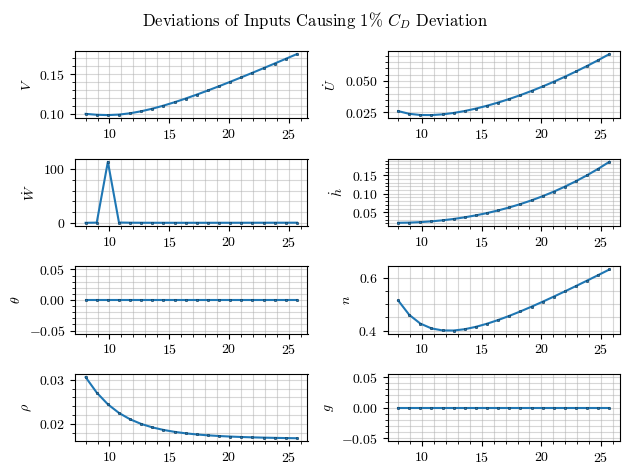

In [19]:
fig = plt.figure()
fig.suptitle("Deviations of Inputs Causing 1% $C_D$ Deviation")
ax0 = plt.subplot(4,2,1)
ax1 = plt.subplot(4,2,2)
ax2 = plt.subplot(4,2,3)
ax3 = plt.subplot(4,2,4)
ax4 = plt.subplot(4,2,5)
ax5 = plt.subplot(4,2,6)
ax6 = plt.subplot(4,2,7)
ax7 = plt.subplot(4,2,8)

ax0.plot(V_op, np.abs(dV_vec), label="1\% Sensitivity")
ax0.set_ylabel('$V$')
ax1.plot(V_op, np.abs(dU_dot_vec), label="1\% Sensitivity")
ax1.set_ylabel("$\dot{U}$")
ax2.plot(V_op, np.abs(dW_dot_vec), label="1\% Sensitivity")
ax2.set_ylabel("$\dot{W}$")
ax3.plot(V_op, np.abs(dh_dot_vec), label="1\% Sensitivity")
ax3.set_ylabel("$\dot{h}$")
ax4.plot(V_op, np.abs(dtheta_vec), label="1\% Sensitivity")
ax4.set_ylabel("$\\theta$")
ax5.plot(V_op, np.abs(dn_vec), label="1\% Sensitivity")
ax5.set_ylabel("$n$")
ax6.plot(V_op, np.abs(drho_vec), label="1\% Sensitivity")
ax6.set_ylabel("$\\rho$")
ax7.plot(V_op, np.abs(dg_vec), label="1\% Sensitivity")
ax7.set_ylabel("$g$")
plt.show()

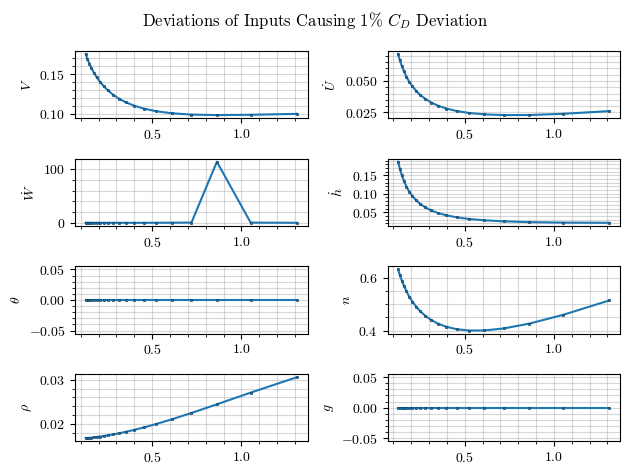

In [20]:
fig = plt.figure()
fig.suptitle("Deviations of Inputs Causing 1% $C_D$ Deviation")
ax0 = plt.subplot(4,2,1)
ax1 = plt.subplot(4,2,2)
ax2 = plt.subplot(4,2,3)
ax3 = plt.subplot(4,2,4)
ax4 = plt.subplot(4,2,5)
ax5 = plt.subplot(4,2,6)
ax6 = plt.subplot(4,2,7)
ax7 = plt.subplot(4,2,8)

ax0.plot(C_L_base_vec, np.abs(dV_vec), label="1\% Sensitivity")
ax0.set_ylabel('$V$')
ax1.plot(C_L_base_vec, np.abs(dU_dot_vec), label="1\% Sensitivity")
ax1.set_ylabel("$\dot{U}$")
ax2.plot(C_L_base_vec, np.abs(dW_dot_vec), label="1\% Sensitivity")
ax2.set_ylabel("$\dot{W}$")
ax3.plot(C_L_base_vec, np.abs(dh_dot_vec), label="1\% Sensitivity")
ax3.set_ylabel("$\dot{h}$")
ax4.plot(C_L_base_vec, np.abs(dtheta_vec), label="1\% Sensitivity")
ax4.set_ylabel("$\\theta$")
ax5.plot(C_L_base_vec, np.abs(dn_vec), label="1\% Sensitivity")
ax5.set_ylabel("$n$")
ax6.plot(C_L_base_vec, np.abs(drho_vec), label="1\% Sensitivity")
ax6.set_ylabel("$\\rho$")
ax7.plot(C_L_base_vec, np.abs(dg_vec), label="1\% Sensitivity")
ax7.set_ylabel("$g$")
plt.show()

In [21]:
dW_dot_vec

array([  0.27586425,   0.59774098, 113.21829332,  -0.76970566,
        -0.4444598 ,  -0.34640239,  -0.30557953,  -0.28817016,
        -0.28292855,  -0.28504454,  -0.29211774,  -0.30281744,
        -0.31634717,  -0.33220148,  -0.35004446,  -0.36964437,
        -0.3908363 ,  -0.41349986,  -0.43754514,  -0.46290372])